In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
DC_properties = pd.read_csv("datasets/DC_Properties.csv")
DC_properties.head()

C:\Users\Tati\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
DC_properties.shape

(158957, 49)

In [4]:
DC_properties.drop(['STRUCT', 'STORIES', 'NUM_UNITS',
                       'Unnamed: 0', 'SALE_NUM','QUALIFIED','BLDG_NUM',
                       'STYLE', 'LATITUDE', 'LONGITUDE',
                   'X', 'Y', 'WARD', 'SQUARE',
                   'CENSUS_BLOCK', 'EXTWALL', 'ROOF', 'INTWALL',
                    'CENSUS_TRACT', 'ASSESSMENT_NBHD', 'LIVING_GBA',
                    'ASSESSMENT_SUBNBHD', 'GIS_LAST_MOD_DTTM',
                   'HEAT', 'USECODE', 'LANDAREA', 'FULLADDRESS', 'CMPLX_NUM', 'NATIONALGRID'],
                   axis=1, inplace = True)

In [5]:
DC_properties.columns

Index(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'SALEDATE', 'PRICE', 'GBA', 'GRADE', 'CNDTN', 'KITCHENS', 'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT'],
      dtype='object')

In [6]:
DC_properties.corr()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,GBA,KITCHENS,FIREPLACES,ZIPCODE
BATHRM,1.000000,0.248759,0.677751,0.655563,-0.039087,0.239797,0.269444,-0.006536,0.682977,0.423178,-0.001632,-0.063410
HF_BATHRM,0.248759,1.000000,0.353825,0.375568,-0.009372,0.148483,0.235645,-0.013113,0.272598,-0.132895,-0.001635,-0.020164
ROOMS,0.677751,0.353825,1.000000,0.841309,-0.219367,0.161396,0.158847,-0.038241,0.679725,0.525796,-0.003660,-0.053109
BEDRM,0.655563,0.375568,0.841309,1.000000,-0.242955,0.214655,0.168913,-0.043331,0.631736,0.346781,-0.004696,-0.071962
AYB,-0.039087,-0.009372,-0.219367,-0.242955,1.000000,0.021678,0.660668,0.056041,0.006706,-0.108947,0.001453,0.175098
YR_RMDL,0.239797,0.148483,0.161396,0.214655,0.021678,1.000000,0.256227,0.030072,0.005231,0.003241,0.001622,-0.098040
EYB,0.269444,0.235645,0.158847,0.168913,0.660668,0.256227,1.000000,0.049627,0.311207,-0.048890,0.000097,0.041599
PRICE,-0.006536,-0.013113,-0.038241,-0.043331,0.056041,0.030072,0.049627,1.000000,0.600576,0.045213,0.023989,0.001467
GBA,0.682977,0.272598,0.679725,0.631736,0.006706,0.005231,0.311207,0.600576,1.000000,0.279690,0.502708,-0.097850
KITCHENS,0.423178,-0.132895,0.525796,0.346781,-0.108947,0.003241,-0.048890,0.045213,0.279690,1.000000,-0.008160,-0.104648


In [7]:
DC_price = DC_properties[DC_properties['PRICE'].notnull()]
DC_price.shape

(98216, 20)

In [8]:
DC_real_Count_price = DC_price[(DC_price['BEDRM']!= 0) &
                           (DC_price['BEDRM']<= 4) &
                           (DC_price['PRICE']!= 0) &
                            (DC_price['PRICE']>=234000) &
                          (DC_price['PRICE']<1200000) &
                           (DC_price['KITCHENS']!=0) &
                           (DC_price['KITCHENS']<=4) &
                            (DC_price['FIREPLACES']<=3) &
                           (DC_price['BATHRM']!= 0) &
                            (DC_price['BATHRM']<= 3) &
                            (DC_price['HF_BATHRM']<= 2) &
                            (DC_price['GBA']>= 1100) &
                            (DC_price['GBA']<= 2000)]
DC_real_Count_price.shape

(24001, 20)

In [9]:
DC_real_Count_price.describe()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,GBA,KITCHENS,FIREPLACES,ZIPCODE
count,24001.000000,24001.000000,24001.000000,24001.000000,23975.000000,14539.000000,24001.000000,2.400100e+04,24001.000000,24001.000000,24001.000000,24001.000000
mean,2.039748,0.704637,6.908004,3.159785,1934.439583,2005.166174,1971.216991,5.575819e+05,1484.820007,1.137703,0.550894,20010.639307
std,0.717811,0.556296,1.290137,0.594146,32.423672,20.427968,17.207072,2.245460e+05,229.418268,0.359623,0.681728,7.319297
min,1.000000,0.000000,2.000000,1.000000,1776.000000,20.000000,1940.000000,2.340000e+05,1100.000000,1.000000,0.000000,20001.000000
25%,2.000000,0.000000,6.000000,3.000000,1912.000000,2003.000000,1961.000000,3.630000e+05,1296.000000,1.000000,0.000000,20003.000000
50%,2.000000,1.000000,7.000000,3.000000,1927.000000,2009.000000,1967.000000,5.250000e+05,1460.000000,1.000000,0.000000,20011.000000
75%,3.000000,1.000000,8.000000,4.000000,1942.000000,2013.000000,1975.000000,7.280000e+05,1653.000000,1.000000,1.000000,20017.000000
max,3.000000,2.000000,16.000000,4.000000,2018.000000,2018.000000,2018.000000,1.199000e+06,2000.000000,4.000000,3.000000,20052.000000


In [10]:
DC_real_Count_price.corr()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,GBA,KITCHENS,FIREPLACES,ZIPCODE
BATHRM,1.000000,-0.007641,0.297526,0.326269,0.170206,0.138184,0.317581,0.271060,0.250797,0.213325,0.060662,0.026410
HF_BATHRM,-0.007641,1.000000,0.082256,0.041439,0.202501,0.033977,0.293615,0.081686,0.169388,-0.063487,0.071775,0.083186
ROOMS,0.297526,0.082256,1.000000,0.390766,0.041802,0.028540,0.048216,0.105652,0.252396,0.156356,0.055919,0.028313
BEDRM,0.326269,0.041439,0.390766,1.000000,-0.001093,0.073083,0.015882,0.096359,0.277365,0.148772,-0.011282,0.035051
AYB,0.170206,0.202501,0.041802,-0.001093,1.000000,0.069636,0.748405,-0.211208,0.009171,-0.182058,-0.124712,0.518627
YR_RMDL,0.138184,0.033977,0.028540,0.073083,0.069636,1.000000,0.166860,0.052530,-0.032276,-0.018553,-0.108819,0.034601
EYB,0.317581,0.293615,0.048216,0.015882,0.748405,0.166860,1.000000,0.056928,0.110419,-0.076189,-0.079842,0.274663
PRICE,0.271060,0.081686,0.105652,0.096359,-0.211208,0.052530,0.056928,1.000000,0.234426,0.111474,0.267892,-0.269562
GBA,0.250797,0.169388,0.252396,0.277365,0.009171,-0.032276,0.110419,0.234426,1.000000,0.047306,0.260070,0.012577
KITCHENS,0.213325,-0.063487,0.156356,0.148772,-0.182058,-0.018553,-0.076189,0.111474,0.047306,1.000000,0.028093,-0.196777


In [11]:
X = DC_real_Count_price.drop(['BATHRM', 'HF_BATHRM', 'AC', 'ROOMS',
                              'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
                               'SALEDATE', 'GBA', 'GRADE', 'CNDTN',
                              'KITCHENS',  'FIREPLACES',
       'SOURCE', 'CITY', 'STATE', 'ZIPCODE', 'QUADRANT'], axis=1)
lm = LinearRegression()

In [12]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, DC_real_Count_price.PRICE, test_size=0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16800, 1)
(7201, 1)
(16800,)
(7201,)


In [13]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -1.1641532182693481e-10


In [15]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

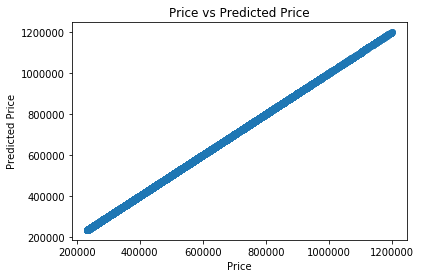

In [16]:
plt.scatter(DC_real_Count_price['PRICE'], lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [17]:
print(lm.score(X_train, Y_train))
print(lm.score(X_test, Y_test))

1.0
1.0


In [18]:
result = smf.ols('PRICE ~ BATHRM + FIREPLACES + AYB + EYB + GBA + YR_RMDL -1',
                   data=DC_real_Count_price).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.320e+04
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:15:14   Log-Likelihood:            -1.9770e+05
No. Observations:               14527   AIC:                         3.954e+05
Df Residuals:                   14521   BIC:                         3.955e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BATHRM      6.942e+04   2356.382     29.460      0.000    6.48e+04     7.4e+04
FIREPLACES  5.974e+04   2433.319     24.552      0.000     5.5e+04    6.45e+04
AYB        -3255.9562     83.594    -38.949      0.000   -3419.812   -3092.101
EYB         3553.9886    111.608     31.843      0.000    3335.222    3772.755
GBA           93.8282      7.568     12.399      0.000      78.995     108.661
YR_RMDL     -229.2949     79.086     -2.899      0.004    -384.313     -74.277
==============================================================================
Omnibus:                      110.495   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.430
Skew:                           0.163   Prob(JB):                     1.56e-22
Kurtosis:                       2.755   Cond. No.                     5.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis for Stats Model
Ideally an investor would be interested in residential houses (not condos) in the NW quadrant. Since "actual year built" has a negative coefficient and "last year an improvement was built" has a positive coefficient based on this model, an older house with more recent constructruction would sell for a higher price. Additionally, a bigger house based on the gross building area in square feet should also sell for a higher price.

## Analysis for SKLearn
Using the statsmodel, the adjusted R squared value was 0.905. Here the factors for the price vs. the predicted price using sklearn appear to have a very accurate model, since the MSE is equal to 1.